In [17]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sve_gen as gen
import get_M as gm
import correlate as corr
import plot_correlation as pltcorr
import pca_on_correlations as pcaC
import plot_pc_map as pltPC
import time
import h5py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
ns_cal = [10, 30, 30]
set_id_cal = ['inclusion', 'bicrystal', 'gaussian']

# ns_cal = [30, 30, 30]
# set_id_cal = ['incl1', 'incl2', 'incl3']

el = 21
H = 2

wrt_file = 'log_%s.txt' % (time.strftime("%Y-%m-%d_h%Hm%M"))

In [19]:
"""Generate microstructures"""

f = h5py.File("spatial_stats.hdf5", 'w')
f.close()

vfrac = [.1]
gen.inclusion_red(el, ns_cal[0], H, set_id_cal[0], wrt_file, vfrac)

gen.bicrystal_orthog(el, ns_cal[1], H, set_id_cal[1], wrt_file)
gen.improcess(el, ns_cal[2], H, set_id_cal[2], wrt_file)

# # gen.delta(el, ns_cal[0], H, set_id_cal[0], wrt_file)

# vfrac = [.075, .125]
# gen.inclusion_red(el, ns_cal[0], H, set_id_cal[0], wrt_file, vfrac)
# vfrac = [.100, .100]
# gen.inclusion_red(el, ns_cal[1], H, set_id_cal[1], wrt_file, vfrac)
# vfrac = [.125, .075]
# gen.inclusion_red(el, ns_cal[2], H, set_id_cal[2], wrt_file, vfrac)

# gen.bicrystal_orthog(el, ns_cal[1], H, set_id_cal[1], wrt_file)
# gen.improcess(el, ns_cal[2], H, set_id_cal[2], wrt_file)

10 SVEs with inclusions generated: 0.016s
30 bicrystal SVEs generated: 0.594s
30 bicrystal SVEs generated: 0.073s


In [20]:
"""Generate the fourier space microstructure functions"""

for ii in xrange(len(set_id_cal)):
    gm.get_M(el, ns_cal[ii], H, set_id_cal[ii], wrt_file)

M computed: 0.357s
M computed: 1.521s
M computed: 1.703s


In [21]:
"""Compute the periodic statistics for the microstructures"""
for ii in xrange(len(set_id_cal)):
    corr.correlate(el, ns_cal[ii], H, set_id_cal[ii], wrt_file)

ff = 0.006 gb
correlations computed: 1.128s
ff = 0.018 gb
correlations computed: 4.111s
ff = 0.018 gb
correlations computed: 4.729s


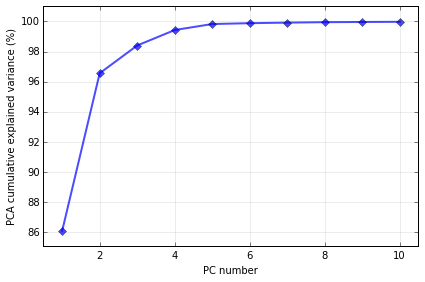

PCA completed: 1.593s


In [22]:
"""Perform PCA on autocorrelations"""
pcaC.doPCA(el, ns_cal, H, set_id_cal, wrt_file)

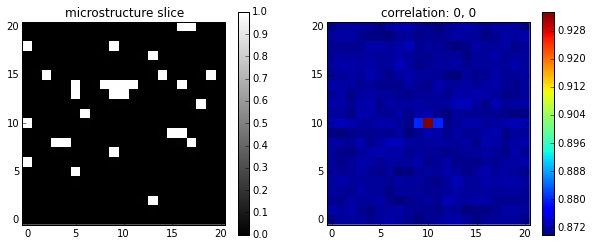

In [44]:
"""Plot an autocorrelation"""
set_num = 2
sn = 6
iA = 0
iB = 0
pltcorr.pltcorr(el, ns_cal[set_num], set_id_cal[set_num], sn, iA, iB)

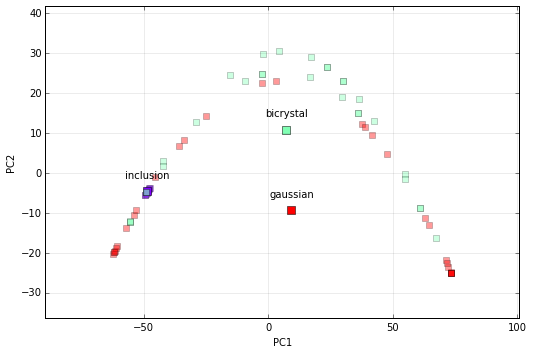

In [24]:
"""Plot the microstructures in PC space"""
pcA = 0
pcB = 1
pltPC.pltmap(ns_cal, set_id_cal, pcA, pcB)